In [1]:
import sys,csv,re
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
class SentimentAnalysis:
    
    def __init__(self):
        self.tweets = []
        self.tweetText = []
        
    def DownloadData(self):
        consumerKey = '59oDfXxmBBm22p2j3Gowy4lEE'
        consumerSecret = "bZufUMPivqtX94xG4Bt3QmsmqyL7TsDbkW8Kuo3cGYeFfKoysY"
        accessToken = "3060838521-u5eXreDFHOqaxUcvTYMFyuEXImu5RlpdiY436h8"
        accessTokenSecret = "Q55FxITLmzlJWW4xpNbwnsW2UPXQZL4KiOWf9QdsDlYKt"
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)
        
        searchTweet = input('Enter the search text : ')
        NoOfTweets  = int(input('The number of tweets to be considered : '))
        
        self.tweets = tweepy.Cursor(api.search, q=searchTweet, lang='en').items(NoOfTweets)
        
        csvFile = open('result.csv', 'a')
        csvWrite = csv.writer(csvFile)
        
        polarity = 0
        wpositive = 0
        positive = 0
        spositive = 0
        neutral = 0
        wnegative = 0
        negative = 0
        snegative = 0
        
        
        
        for tweet in self.tweets:
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            analysis = TextBlob(tweet.text)
            polarity = analysis.sentiment.polarity + 1
            
            if analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3:
                wpositive += 1
            elif analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <=0.6:
                positive += 1
            elif analysis.sentiment.polarity > 0.6:
                spositive += 1
            elif analysis.sentiment.polarity == 0:
                neutral += 1
            elif analysis.sentiment.polarity >= -0.3 and analysis.sentiment.polarity <= 0:
                wnegative += 1
            elif analysis.sentiment.polarity >= -0.6 and analysis.sentiment.polarity < -0.3:
                negative += 1
            elif analysis.sentiment.polarity < -0.6:
                snegative += 1
        
        csvWrite.writerow(self.tweetText)
        csvFile.close()
        
        
        wpositive = self.percentage(wpositive, NoOfTweets)
        positive = self.percentage(positive, NoOfTweets)
        spositive = self.percentage(spositive, NoOfTweets)
        neutral = self.percentage(neutral, NoOfTweets)
        wnegative = self.percentage(wnegative, NoOfTweets)
        negative = self.percentage(negative, NoOfTweets)
        snegative = self.percentage(snegative, NoOfTweets)
        
        
        
        polarity = polarity/NoOfTweets
        
        
        print('\n\n\n')
        print('--------------------------------------------------')
        print('\nReaction to the Tweet :', searchTweet)
        print('\nOverall Reaction is : ')
        
        if polarity > 0 and polarity <= 0.3:
            print('Weakly Positive')
        elif polarity > 0.3 and polarity <= 0.6:
            print('Positive')
        elif polarity > 0.6:
            print('Strongly Positive')
        elif polarity == 0:
            print('Neutral')
        elif polarity >= -0.3 and polarity < 0:
            print('Weakly negative')
        elif polarity > -0.6 and polarity < -0.3:
            print('Negative')
        elif polarity < -0.6:
            print('Strongly Negative')
        
        print('\n\nDetailed Report generated is as follows :')
        print('Weakly Positive : '+ wpositive+'%')
        print('Positive : ' + positive+'%')
        print('Strongly Positive : ' + spositive+'%')
        print('Neutral : ' + neutral+'%')
        print('Weakly Negative : ' + wnegative+'%')
        print('Negative : ' + negative+'%')
        print('Strongly Negative : ' + snegative+'%')
        
        
        self.plotPieChart(wpositive, positive, spositive, neutral, wnegative, negative, snegative, searchTweet, NoOfTweets)
        
        
    
    
    
    def cleanTweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)", " ", tweet).split())
    
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        print(temp)
        return format(temp, '.2f')
    
    def plotPieChart(self, wpositive, positive, spositive, neutral, wnegative, negative, snegative, searchTweet, NoOfTweets):
        data = [wpositive, positive, spositive, neutral, wnegative, negative, snegative]
        color = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'lightsalmon', 'red', 'darkred']
        label = ['Weakly Positive['+ str(wpositive)+'%]', 'Positive['+ str(positive)+'%]',
                'Strongly Positive['+ str(spositive) +'%]', 'Neutral['+ str(neutral)+'%]',
                'Weakly Negative['+ str(wnegative) +'%]', 'Negative['+ str(negative) +'%]',
                'Strongly Negative['+ str(snegative) +'%]']
        plt.figure(figsize=(10,7))
        plt.pie(data, colors=color, startangle=90, counterclock=True, explode=(0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0), shadow=True)
        plt.title('\nPie Chart dipicting value associated with tweet outcomes')
        plt.tight_layout()
        plt.legend(label, loc='lower right')
        plt.show()

Enter the search text : jack dorsey
The number of tweets to be considered : 100
28.0
2.0
0.0
54.0
11.0
4.0
1.0




--------------------------------------------------

Reaction to the Tweet : jack dorsey

Overall Reaction is : 
Weakly Positive


Detailed Report generated is as follows :
Weakly Positive : 28.00%
Positive : 2.00%
Strongly Positive : 0.00%
Neutral : 54.00%
Weakly Negative : 11.00%
Negative : 4.00%
Strongly Negative : 1.00%


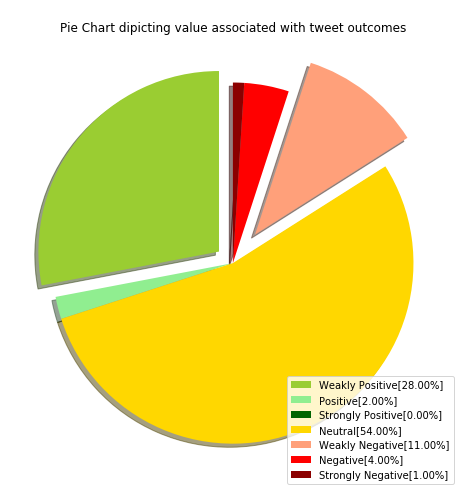

In [3]:
if __name__=='__main__':
    sa = SentimentAnalysis()
    sa.DownloadData()